In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator

simulator = AerSimulator()

In [2]:
π = np.pi
φ = Parameter('φ')

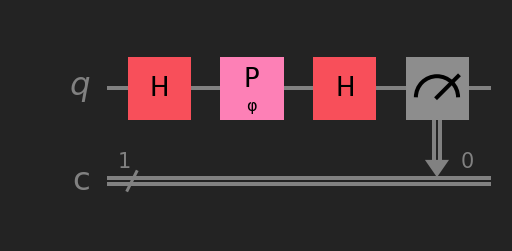

In [3]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.p(φ,0)
qc.h(0)
qc.measure(0,0)
qc.draw()

In [4]:
qc_trans = transpile(qc, backend=simulator)

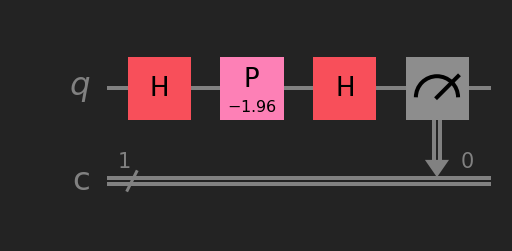

In [5]:
runs = 8192
φ_lst = np.random.uniform(-3*π,3*π,runs)

circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [6]:
job = simulator.run(circuits, shots=1, memory=True)
sim_results = job.result()

In [7]:
φ_hit = []

for i, circ in enumerate(circuits):
    result = sim_results.get_memory(circ)[0]
    if result == '0':
        φ_hit.append(φ_lst[i])

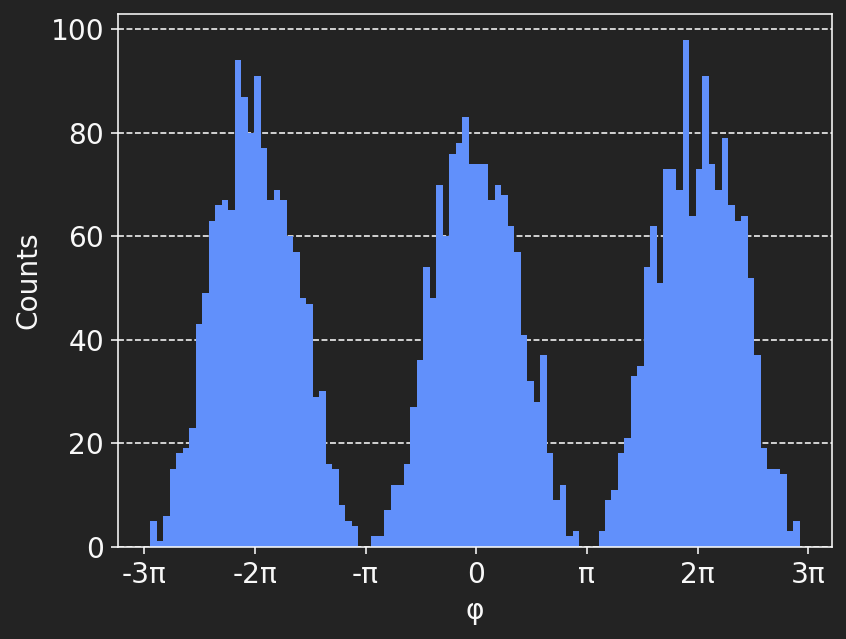

In [20]:
ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [9]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

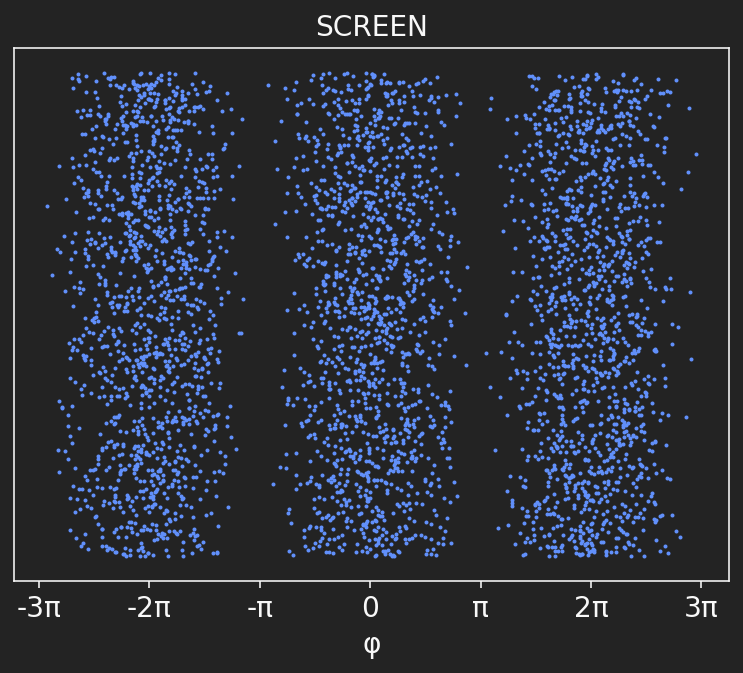

In [10]:
plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

### Using 100 Circuits (steps of $\frac{6\pi}{100}$):

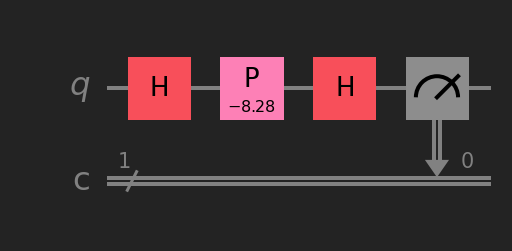

In [11]:
runs = 100
shots = 512
φ_lst = np.linspace(-3*π,3*π,runs)

circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [12]:
job = simulator.run(circuits, shots=shots)
sim_results = job.result()

In [13]:
φ_hit = []

for i, circ in enumerate(circuits):
    zero_counts = sim_results.get_counts(circ).get('0')
    
    if zero_counts is not None:
        φ_hit += zero_counts*[φ_lst[i]]

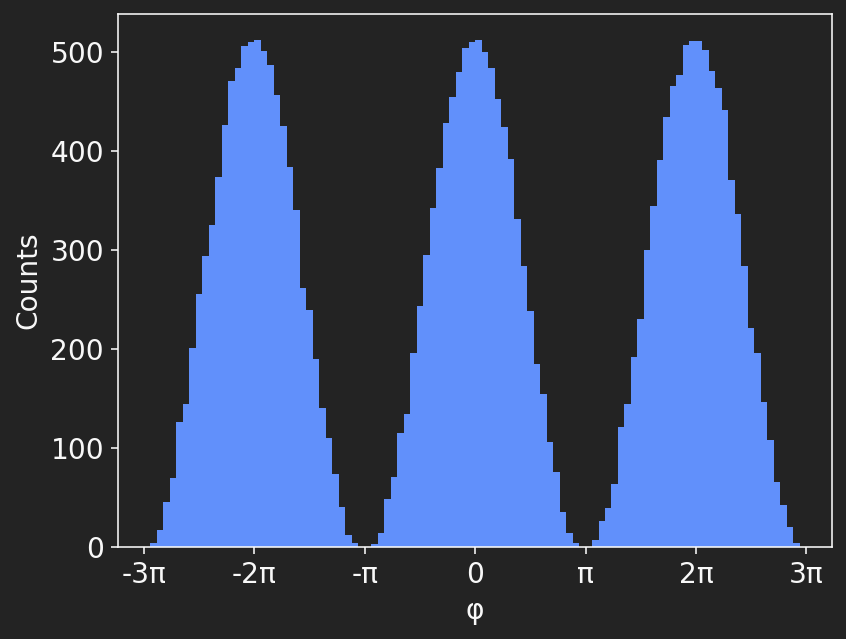

In [14]:
ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [15]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

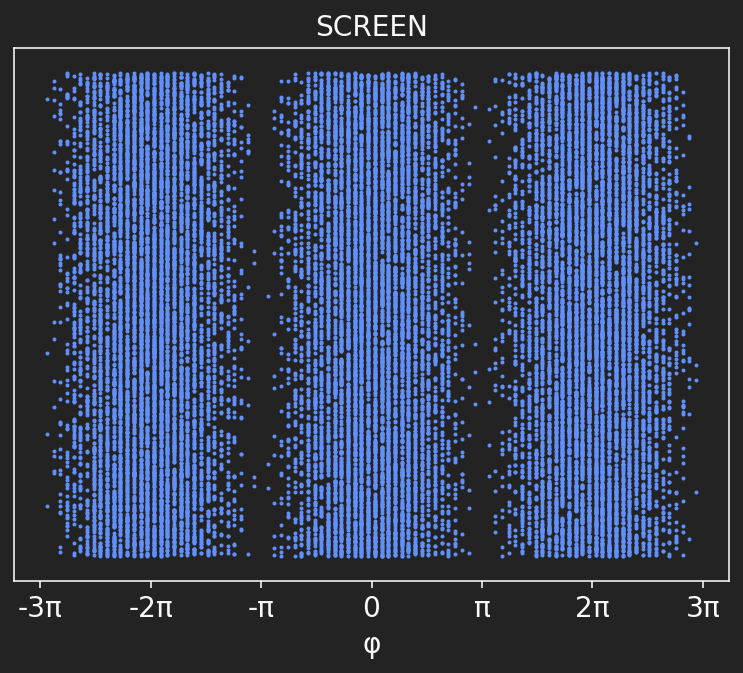

In [16]:
plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

In [17]:
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.job import job_monitor

In [18]:
provider = IBMProvider()
'''
small_devices = provider.backends(min_num_qubits=5, 
                                  simulator=False, 
                                  operational=True)
qpu = least_busy(small_devices)
'''
qpu = provider.get_backend('ibm_nairobi')
print(qpu.name)

ibm_nairobi


In [19]:
qc_trans = transpile(qc, backend=qpu)

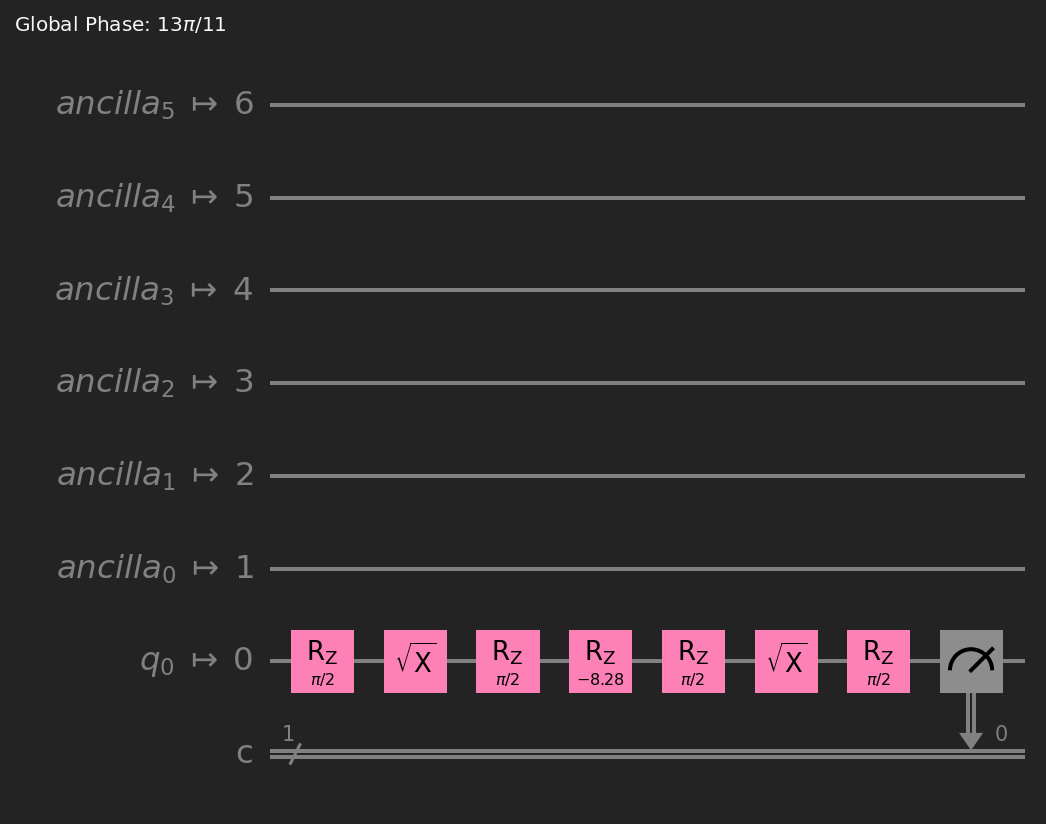

In [20]:
circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [21]:
job = qpu.run(circuits, shots=shots)
job_id = job.job_id()
print(job_id)

cmvca9sjad30008eba60


In [22]:
retrieve_job = provider.retrieve_job(job_id)
retrieve_job.status()

<JobStatus.QUEUED: 'job is queued'>

In [23]:
qpu_results = job.result()

In [24]:
φ_hit = []

for i, circ in enumerate(circuits):
    zero_counts = qpu_results.get_counts(circ).get('0')
    
    if zero_counts is not None:
        φ_hit += zero_counts*[φ_lst[i]]

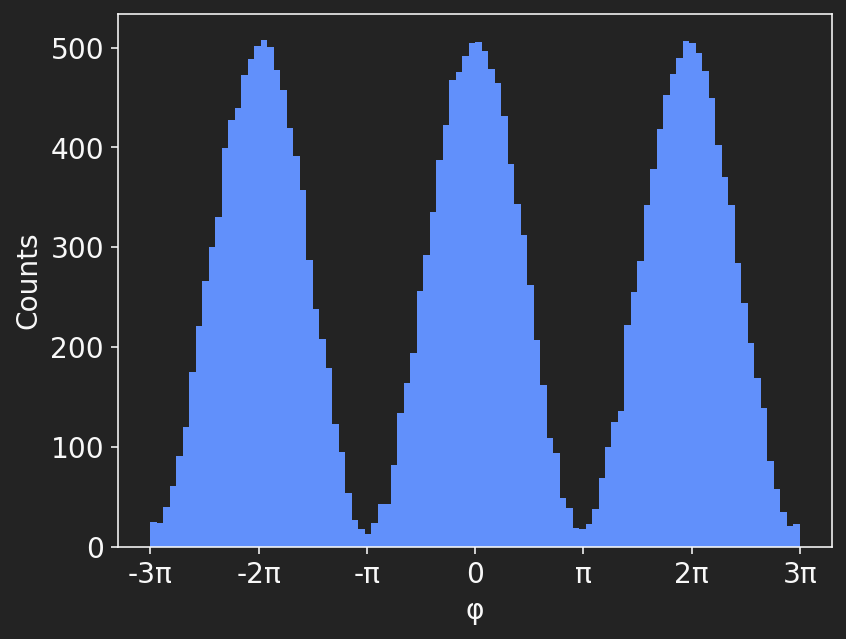

In [25]:
ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [26]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

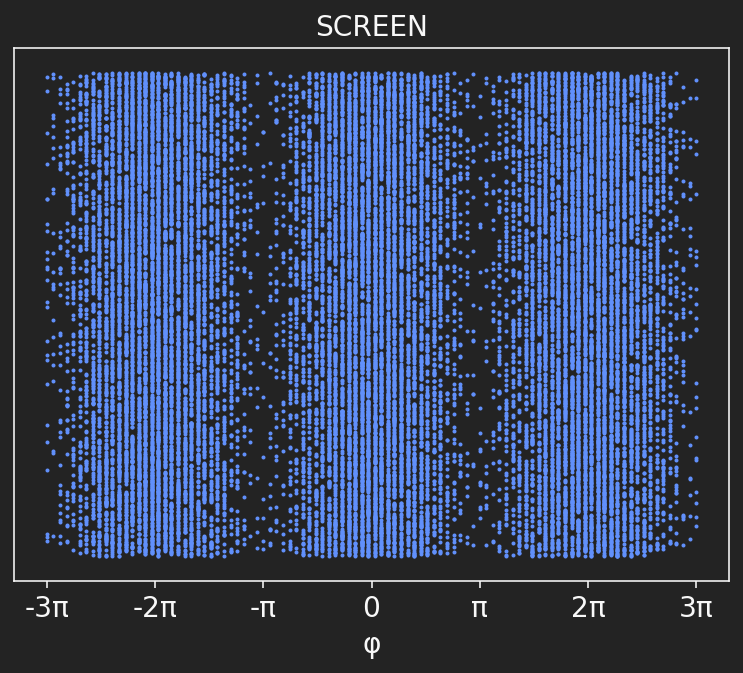

In [27]:
plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

### With Collapse

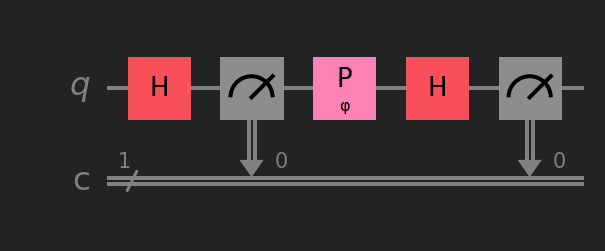

In [28]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.p(φ,0)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [29]:
qc_trans = transpile(qc, backend=simulator)

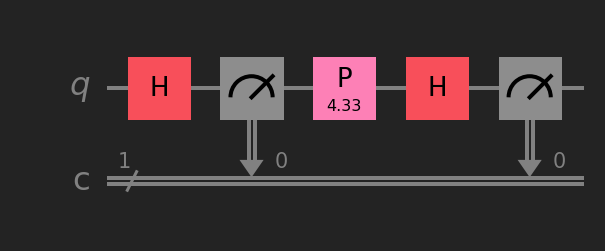

In [30]:
runs = 8192
φ_lst = np.random.uniform(-3*π,3*π,runs)

circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [31]:
job = simulator.run(circuits, shots=1, memory=True)
sim_results = job.result()

φ_hit = []

for i, circ in enumerate(circuits):
    result = sim_results.get_memory(circ)[0]
    if result == '0':
        φ_hit.append(φ_lst[i])

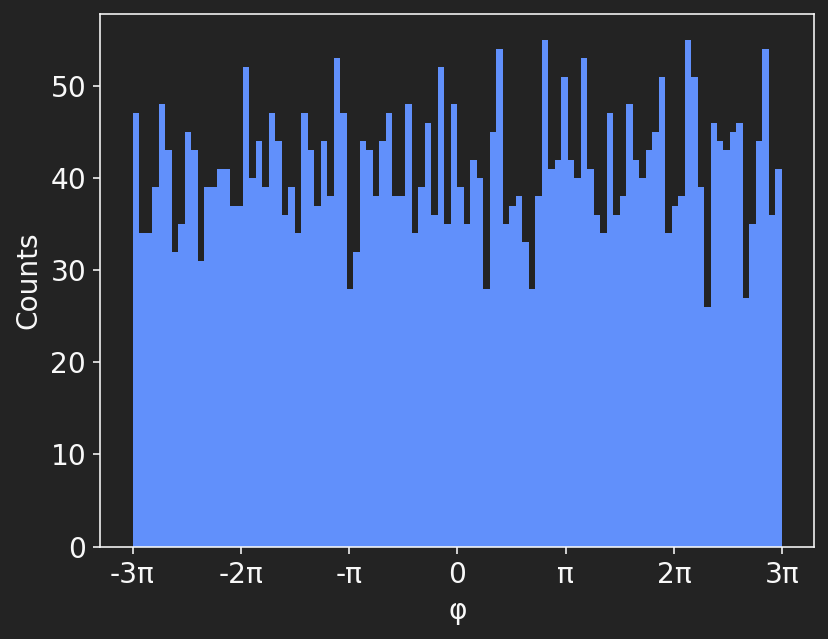

In [32]:
ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [33]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

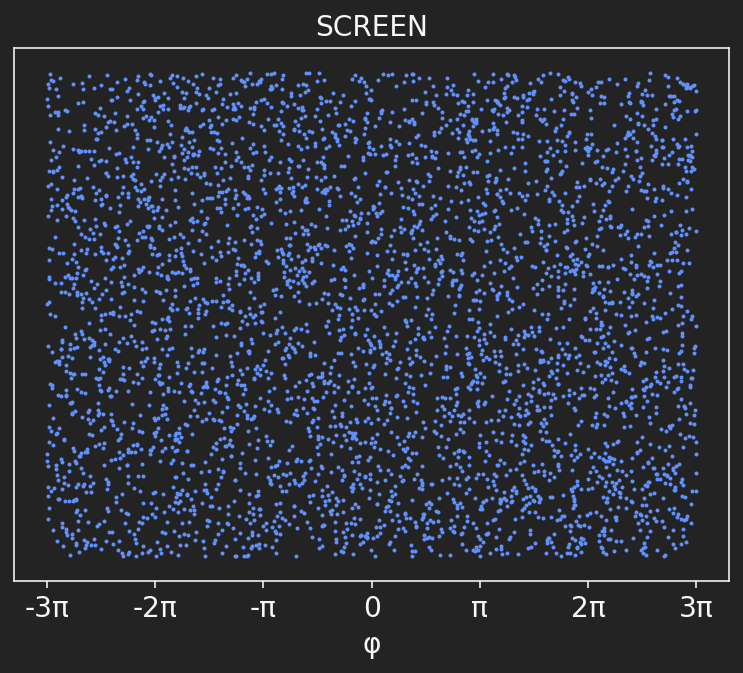

In [34]:
plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()